# 딥러닝 예제 (mnist 데이터셋 사용)

### 패션 데이터셋

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import fetch_openml

In [5]:
mnist=fetch_openml(name='Fashion-MNIST')

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0    33.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [25]:
type(mnist.data)
x=mnist.data.to_numpy()/255

pandas.core.frame.DataFrame

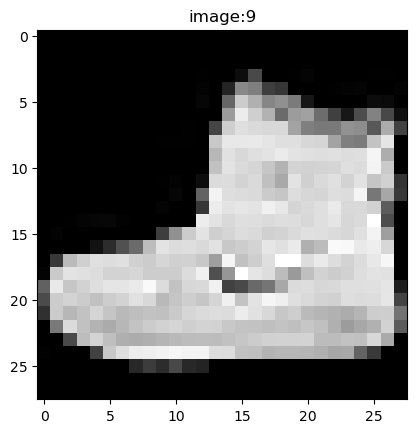

In [68]:
plt.imshow(mnist.data.to_numpy()[0].reshape(28,28), cmap='gray')
plt.title('image:'+str(mnist.target.to_numpy()[0]))
plt.show()

In [8]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


In [9]:
mnist.target

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [18]:
mnist.target=mnist.target.astype(np.int8)
mnist.target

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: int8

### 정규화 : 값을 0-1 사이 값으로

In [41]:
x=mnist.data.to_numpy()/255
y=mnist.target.to_numpy()

In [27]:
x[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
y[0]

9

In [43]:
type(y)

numpy.ndarray

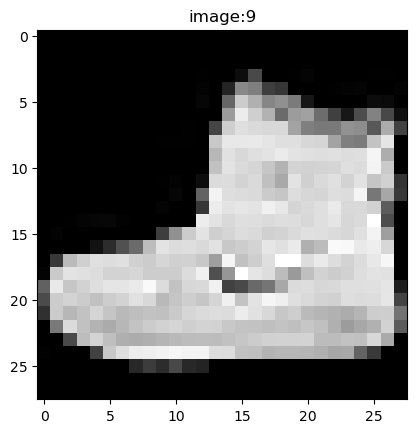

In [44]:
plt.imshow(x[0].reshape(28,28), cmap='gray')
plt.title('image:'+str(y[0]))
plt.show()

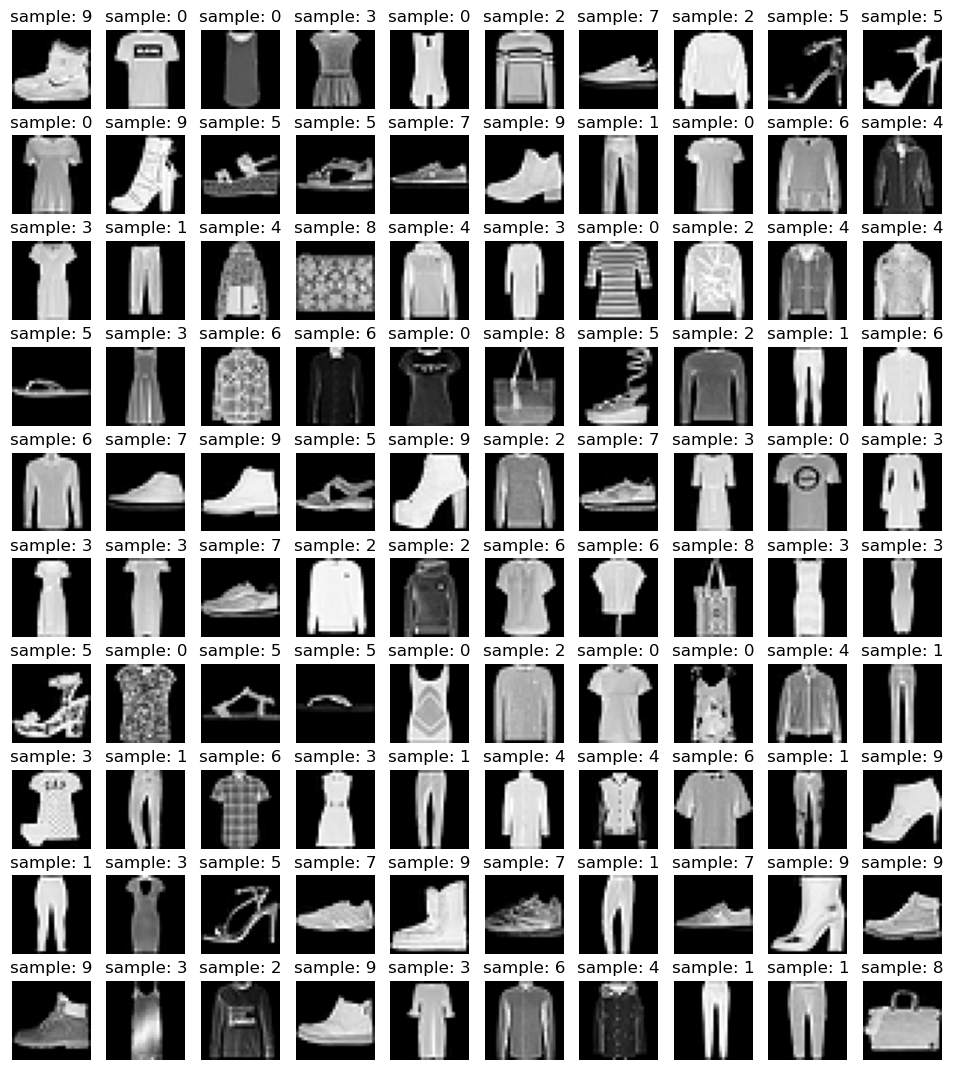

In [45]:
plt.figure(figsize=(12,13.5))   #전체 그림 사이즈

for i in range(100):
    plt.subplot(10,10, i+1)
    plt.axis('off')
    plt.imshow(x[i].reshape(28,28), cmap='gray')
    plt.title('sample: %i' % (y[i]))
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=1/7, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [49]:
X_train=torch.FloatTensor(x_train)
X_test=torch.FloatTensor(x_test)
Y_train=torch.LongTensor(y_train)
Y_test=torch.LongTensor(y_test)

- **데이터셋** 만들기

- **데이터 로더** : 한번에 처리할 데이터를 올려주는 역할
- **epoch(에폭)** : train 데이터셋 크기를 모두 훈련  
  ex) 전체 훈련데이터가 60000개, 데이터로더 batch_size= 64 일 경우, 1epoch 당 W(가중치),b(편향) 업데이트는 60000/64 만큼 일어남

In [51]:
#dset
ds_train=TensorDataset(X_train, Y_train)    #하나의 데이터 셋으로 묶어줌
load_train=DataLoader(ds_train, batch_size=64, shuffle=True)    #데이터로더 (데이터셋, batch_size(한번에 계산할 데이터량), shuffle=True(섞어서 추출함))

ds_test=TensorDataset(X_test,Y_test)
load_test=DataLoader(ds_test, batch_size=64, shuffle=True)


- 모델 만들기

In [52]:
model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))  #Linear(가로*세로*채널(흑백=1, 칼라=3), 출력값)
model.add_module('relu1',nn.ReLU())
model.add_module('fc2',nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc3',nn.Linear(100,100))
model.add_module('relu3',nn.ReLU())
model.add_module('fc4',nn.Linear(100,10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


- 손실함수, 최적화 함수 만들기

In [53]:
loss_func=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters())
print(model.parameters())
# print(list(model.parameters()))

<generator object Module.parameters at 0x0000025DEDE677D0>


- 훈련 함수

In [54]:
costs=[]
accuracys=[]
epochs=[]

def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets, in load_train:       # 배치 사이즈 안에서 연산
        optimizer.zero_grad()
        output=model(data)
        loss=loss_func(output, targets)
        _, y_hat=torch.max(output.data,1)       #확률이 가장 높은 레이블이 무엇인지 계산
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()
        optimizer.step()
    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy/60000)
    print(epoch, cost, accuracy/60000)
    print(accuracy.detach().numpy()/60000)


- 테스트 함수

In [55]:
def test():
    model.eval()
    correct=0

    with torch.no_grad():
        for data, targets in load_test:
            output=model(data)
            _, predicted=torch.max(output, 1)
            correct +=predicted.eq(targets.data.view_as(predicted)).sum()
   
    data_num=len(load_test.dataset)     #총 데이터 건수
    print('테스트 데이터에서 예측 정확도: ', data_num, 100*correct/data_num)

- 훈련 전 테스트 실행

In [56]:
test()

테스트 데이터에서 예측 정확도:  10000 tensor(10.0700)


- 데이터 훈련하기

In [57]:
for epoch in range(10):
    train(epoch)
test()

0 545.04537114501 tensor(0.7912)
0.7911833333333333
1 374.10929068922997 tensor(0.8554)
0.8554
2 332.99679505079985 tensor(0.8696)
0.8696166666666667
3 307.8428115695715 tensor(0.8794)
0.8793833333333333
4 292.25737807154655 tensor(0.8855)
0.8854833333333333
5 278.3808803409338 tensor(0.8901)
0.8901333333333333
6 265.11074498295784 tensor(0.8936)
0.8936166666666666
7 254.3996133133769 tensor(0.8981)
0.8981
8 245.4317205734551 tensor(0.9029)
0.9029
9 239.01958360150456 tensor(0.9035)
0.9034833333333333
테스트 데이터에서 예측 정확도:  10000 tensor(87.9900)


결과:  tensor(9)
정답:  tensor(9)


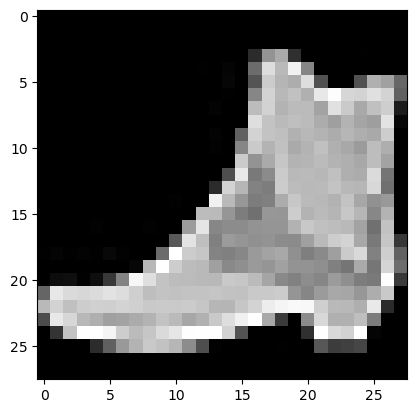

In [59]:
index=12
model.eval()
data=X_test[index]
output=model(data)
_, predicted=torch.max(output.data,0)
print("결과: ", predicted)
print("정답: ", Y_test[index])

X_test_show=(X_test[index].numpy())
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show()

In [60]:
predicteds=model(X_test)
predicted_list=[]
print(predicteds)

tensor([[-15.7590, -11.5486, -13.2307,  ...,   2.6228, -16.2406,  12.0177],
        [ -4.8604,  -6.4992, -12.8407,  ...,  -6.7472,  -5.3723, -10.1843],
        [  0.6183,  -6.5611,  -0.4124,  ..., -12.4581,  -2.2983,  -8.8257],
        ...,
        [ -1.9463,  -7.2835,   1.9826,  ...,  -9.6877,  -5.9664,  -5.1361],
        [-12.3475,  -9.6812, -10.4632,  ...,   1.4586, -13.7954,   9.8915],
        [ -4.6678,  -5.1569,   1.2287,  ..., -12.6521,  -7.6632, -10.4127]],
       grad_fn=<AddmmBackward0>)


In [61]:
predicteds=model(X_test)
predicted_list=[]
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    print(v)
    print(index)

tensor(12.0177, grad_fn=<MaxBackward0>)
tensor(9)
tensor(5.9963, grad_fn=<MaxBackward0>)
tensor(5)
tensor(2.1686, grad_fn=<MaxBackward0>)
tensor(6)
tensor(4.1503, grad_fn=<MaxBackward0>)
tensor(6)
tensor(2.7844, grad_fn=<MaxBackward0>)
tensor(2)
tensor(2.8747, grad_fn=<MaxBackward0>)
tensor(2)
tensor(3.5435, grad_fn=<MaxBackward0>)
tensor(4)
tensor(6.1073, grad_fn=<MaxBackward0>)
tensor(7)
tensor(7.5686, grad_fn=<MaxBackward0>)
tensor(6)
tensor(6.2305, grad_fn=<MaxBackward0>)
tensor(6)
tensor(15.7257, grad_fn=<MaxBackward0>)
tensor(1)
tensor(6.8780, grad_fn=<MaxBackward0>)
tensor(0)
tensor(10.9481, grad_fn=<MaxBackward0>)
tensor(9)
tensor(6.0436, grad_fn=<MaxBackward0>)
tensor(0)
tensor(6.4241, grad_fn=<MaxBackward0>)
tensor(1)
tensor(2.7792, grad_fn=<MaxBackward0>)
tensor(6)
tensor(2.5567, grad_fn=<MaxBackward0>)
tensor(0)
tensor(8.5904, grad_fn=<MaxBackward0>)
tensor(5)
tensor(5.6857, grad_fn=<MaxBackward0>)
tensor(7)
tensor(14.0505, grad_fn=<MaxBackward0>)
tensor(1)
tensor(10.8377, 

In [62]:
predicteds=model(X_test)
predicted_list=[]
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    predicted_list.append(index.item())
print(predicted_list)

[9, 5, 6, 6, 2, 2, 4, 7, 6, 6, 1, 0, 9, 0, 1, 6, 0, 5, 7, 1, 5, 6, 9, 3, 1, 4, 1, 3, 8, 1, 2, 1, 7, 2, 4, 5, 2, 7, 5, 3, 2, 3, 1, 4, 4, 2, 9, 9, 2, 0, 1, 9, 7, 1, 5, 3, 1, 4, 8, 6, 4, 4, 7, 0, 3, 4, 4, 6, 9, 5, 1, 3, 8, 7, 7, 3, 2, 8, 5, 8, 2, 1, 8, 1, 2, 6, 8, 6, 8, 9, 2, 4, 3, 2, 7, 3, 0, 5, 6, 6, 7, 2, 8, 4, 1, 9, 0, 5, 3, 0, 3, 4, 6, 0, 2, 5, 1, 4, 3, 0, 1, 8, 2, 3, 2, 6, 4, 7, 5, 2, 5, 4, 0, 5, 7, 8, 3, 9, 4, 4, 8, 4, 4, 8, 2, 9, 8, 0, 2, 8, 6, 4, 8, 2, 9, 1, 9, 7, 2, 7, 9, 0, 0, 3, 8, 8, 1, 7, 3, 2, 6, 9, 3, 4, 9, 7, 6, 2, 5, 0, 5, 4, 1, 9, 7, 1, 8, 0, 0, 4, 0, 1, 1, 4, 1, 2, 2, 1, 8, 4, 9, 3, 4, 4, 1, 8, 2, 0, 6, 9, 4, 2, 8, 5, 3, 9, 1, 8, 4, 0, 7, 4, 3, 2, 5, 1, 4, 4, 1, 2, 0, 3, 0, 3, 0, 1, 5, 2, 6, 9, 6, 9, 0, 7, 1, 1, 5, 5, 8, 8, 3, 6, 1, 0, 0, 6, 4, 0, 8, 4, 0, 5, 1, 2, 3, 1, 0, 5, 7, 1, 4, 9, 0, 3, 3, 1, 5, 9, 1, 1, 3, 0, 3, 3, 3, 4, 3, 5, 2, 1, 7, 1, 3, 5, 4, 6, 9, 2, 4, 2, 6, 5, 0, 2, 5, 0, 8, 0, 5, 1, 2, 4, 3, 5, 0, 0, 0, 7, 3, 2, 2, 3, 7, 4, 2, 5, 0, 7, 1, 0, 3, 4, 1, 

In [63]:
predicteds=model(X_test)
predicted_list=[]
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    predicted_list.append(index.item())
print(predicted_list)

[9, 5, 6, 6, 2, 2, 4, 7, 6, 6, 1, 0, 9, 0, 1, 6, 0, 5, 7, 1, 5, 6, 9, 3, 1, 4, 1, 3, 8, 1, 2, 1, 7, 2, 4, 5, 2, 7, 5, 3, 2, 3, 1, 4, 4, 2, 9, 9, 2, 0, 1, 9, 7, 1, 5, 3, 1, 4, 8, 6, 4, 4, 7, 0, 3, 4, 4, 6, 9, 5, 1, 3, 8, 7, 7, 3, 2, 8, 5, 8, 2, 1, 8, 1, 2, 6, 8, 6, 8, 9, 2, 4, 3, 2, 7, 3, 0, 5, 6, 6, 7, 2, 8, 4, 1, 9, 0, 5, 3, 0, 3, 4, 6, 0, 2, 5, 1, 4, 3, 0, 1, 8, 2, 3, 2, 6, 4, 7, 5, 2, 5, 4, 0, 5, 7, 8, 3, 9, 4, 4, 8, 4, 4, 8, 2, 9, 8, 0, 2, 8, 6, 4, 8, 2, 9, 1, 9, 7, 2, 7, 9, 0, 0, 3, 8, 8, 1, 7, 3, 2, 6, 9, 3, 4, 9, 7, 6, 2, 5, 0, 5, 4, 1, 9, 7, 1, 8, 0, 0, 4, 0, 1, 1, 4, 1, 2, 2, 1, 8, 4, 9, 3, 4, 4, 1, 8, 2, 0, 6, 9, 4, 2, 8, 5, 3, 9, 1, 8, 4, 0, 7, 4, 3, 2, 5, 1, 4, 4, 1, 2, 0, 3, 0, 3, 0, 1, 5, 2, 6, 9, 6, 9, 0, 7, 1, 1, 5, 5, 8, 8, 3, 6, 1, 0, 0, 6, 4, 0, 8, 4, 0, 5, 1, 2, 3, 1, 0, 5, 7, 1, 4, 9, 0, 3, 3, 1, 5, 9, 1, 1, 3, 0, 3, 3, 3, 4, 3, 5, 2, 1, 7, 1, 3, 5, 4, 6, 9, 2, 4, 2, 6, 5, 0, 2, 5, 0, 8, 0, 5, 1, 2, 4, 3, 5, 0, 0, 0, 7, 3, 2, 2, 3, 7, 4, 2, 5, 0, 7, 1, 0, 3, 4, 1, 

In [64]:
predicteds=model(X_test)
predicted_list=[]
for i in range(len(predicteds)):
    v, index=torch.max(predicteds[i],0)
    predicted_list.append(index.item())
predicted=torch.from_numpy(np.array(predicted_list))
print(predicted)
print(Y_test)

tensor([9, 5, 6,  ..., 6, 9, 4], dtype=torch.int32)
tensor([9, 5, 6,  ..., 6, 9, 4])


In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

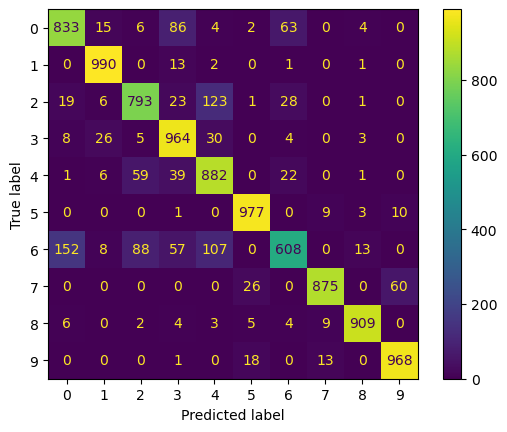

In [66]:
cm=confusion_matrix(Y_test, predicted)
ConfusionMatrixDisplay(cm).plot()